### Load dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/synthetic/baseline_loan_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Application_Date         50000 non-null  object 
 1   Age                      50000 non-null  int64  
 2   Gender                   50000 non-null  object 
 3   Location                 50000 non-null  object 
 4   Education_Level          50000 non-null  object 
 5   Occupation_Type          50000 non-null  object 
 6   Marital_Status           50000 non-null  object 
 7   Number_of_Dependents     50000 non-null  int64  
 8   Years_at_Address         50000 non-null  int64  
 9   Years_at_Employment      50000 non-null  int64  
 10  Monthly_Income           50000 non-null  int64  
 11  Loan_Amount              50000 non-null  int64  
 12  Loan_Term                50000 non-null  int64  
 13  Monthly_Payment          50000 non-null  float64
 14  Payment_to_Income_Rati

In [4]:
df

,Application_Date,Age,Gender,Location,Education_Level,Occupation_Type,Marital_Status,Number_of_Dependents,Years_at_Address,Years_at_Employment,...,Loan_Term,Monthly_Payment,Payment_to_Income_Ratio,Existing_Debt_Amount,Prior_Loans,Payment_History,Bank_Account_Type,Credit_Card,Default_Probability,Loan_Status
0,2022-07-29,33,Male,Java/Urban,Secondary,Formal Employee,Married,5,3,2,...,48,265707.520833,0.142520,3212725,Yes,Good,Basic,Yes,0.033600,Fully Paid
1,2021-12-11,45,Female,Java/Urban,High School,Gig Worker,Single,0,0,5,...,48,314077.522917,0.065219,9313934,No,NaN,Basic,Yes,0.067200,Fully Paid
2,2022-10-06,28,Male,Java/Urban,High School,Formal Employee,Divorced,4,8,1,...,48,259701.956250,0.054264,0,Yes,Poor,Basic,No,0.089600,Fully Paid
3,2021-06-16,31,Male,Sumatra,Elementary,Formal Employee,Divorced,2,9,2,...,24,799312.295833,0.118397,11823877,Yes,Good,Basic,No,0.032256,Fully Paid
4,2022-12-03,31,Male,Java/Rural,High School,Entrepreneur,Divorced,0,2,5,...,24,229166.666667,0.088597,2577363,Yes,Good,Basic,Yes,0.033600,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2021-06-19,56,Male,Sumatra,High School,Entrepreneur,Divorced,4,20,2,...,48,451068.085417,0.073301,14139299,No,NaN,Premium,Yes,0.039424,Fully Paid
49996,2022-11-29,26,Female,Java/Rural,Diploma,Formal Employee,Widowed,4,8,5,...,36,916666.666667,0.078620,9546002,Yes,Good,NaN,No,0.034944,Fully Paid
49997,2022-11-16,54,Male,Java/Urban,High School,Formal Employee,Divorced,5,7,2,...,24,854937.004167,0.135626,8469699,Yes,Good,Basic,Yes,0.029568,Fully Paid
49998,2021-02-05,28,Male,Java/Urban,Elementary,Formal Employee,Widowed,5,1,10,...,48,222617.610417,0.048320,6091369,Yes,Good,Basic,No,0.028224,Fully Paid


### Set up Dagshub connection for MLflow

In [5]:
import dagshub

dagshub.init(repo_owner="saifulrijal873", repo_name="ml-bias-drift-simulation", mlflow=True)

Accessing as saifulrijal873

Initialized MLflow to track repo "saifulrijal873/ml-bias-drift-simulation"

Repository saifulrijal873/ml-bias-drift-simulation initialized!

## PyCaret

In [6]:
import pycaret
pycaret.__version__

'3.3.2'

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

In [7]:
from pycaret.classification import *

### Setup

In [8]:
df.columns

Index(['Application_Date', 'Age', 'Gender', 'Location', 'Education_Level',
       'Occupation_Type', 'Marital_Status', 'Number_of_Dependents',
       'Years_at_Address', 'Years_at_Employment', 'Monthly_Income',
       'Loan_Amount', 'Loan_Term', 'Monthly_Payment',
       'Payment_to_Income_Ratio', 'Existing_Debt_Amount', 'Prior_Loans',
       'Payment_History', 'Bank_Account_Type', 'Credit_Card',
       'Default_Probability', 'Loan_Status'],
      dtype='object')

In [9]:
target_feature = 'Loan_Status'

ignored_features = ['Application_Date', 'Default_Probability']

ordinal_features = {
    "Education_Level": ['Elementary', 'Secondary', 'High School', 'Diploma', 'University']
}

In [10]:
s = setup(
    data=df,
    target=target_feature,
    train_size=0.7,
    ordinal_features=ordinal_features,
    ignore_features=ignored_features,
    preprocess=True,
    imputation_type='simple',
    numeric_imputation='knn',
    categorical_imputation='unknown',
    session_id=42,
    # log_experiment='mlflow',
    # experiment_name='Loan Default Classification'
)

,Description,Value
0,Session id,42
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"Default: 0, Fully Paid: 1"
4,Original data shape,"(50000, 22)"
5,Transformed data shape,"(50000, 35)"
6,Transformed train set shape,"(35000, 35)"
7,Transformed test set shape,"(15000, 35)"
8,Ignore features,2
9,Ordinal features,1


In [11]:
s.pipeline

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Number_of_Dependents',
                                             'Years_at_Address',
                                             'Years_at_Employment',
                                             'Monthly_Income', 'Loan_Amount',
                                             'Loan_Term', 'Monthly_Payment...
                ('onehot_encoding',
                 TransformerWrapper(exclude=None,
                                    include=['Location', 'Education_Level',
                                             'Occupation_Type',
                                             'Marital_Status'],
                                    transformer=OneHotEncoder(cols=['Location',
                                                                    'Education_Level',
                                                                    'Occupation_Type',
                                                                    'Marital_Status'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0)))],
         verbose=False)

### Compare models

In [12]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x71ddd257c400>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x71ddd257c7c0>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x71ddd257ca40>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:
from sklearn.metrics import balanced_accuracy_score, recall_score, make_scorer

def recall_class0(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)

recall_0_scorer = make_scorer(recall_class0)

add_metric('recall_class0', 'Recall Class 0', recall_class0)

Name                                                    Recall Class 0
Display Name                                            Recall Class 0
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(recall_class0, response_method='pr...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: recall_class0, dtype: object

In [16]:
add_metric('balanced_accuracy', 'Balanced Accuracy', balanced_accuracy_score)

Name                                                 Balanced Accuracy
Display Name                                         Balanced Accuracy
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(balanced_accuracy_score, response_...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_accuracy, dtype: object

In [17]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x71ddd257c400>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x71ddd257c7c0>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x71ddd257ca40>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False
recall_class0,Recall Class 0,Recall Class 0,<pycaret.internal.metrics.EncodedDecodedLabels...,"make_scorer(recall_class0, response_method='pr...",pred,{},True,True,True
balanced_accuracy,Balanced Accuracy,Balanced Accuracy,<pycaret.internal.metrics.EncodedDecodedLabels...,"make_scorer(balanced_accuracy_score, response_...",pred,{},True,True,True


In [18]:
base_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy,TT (Sec)
ada,Ada Boost Classifier,0.9433,0.6805,0.9433,0.9011,0.9158,0.0018,0.0134,0.0000,0.5005,1.5500
lr,Logistic Regression,0.9432,0.5817,0.9432,0.8897,0.9157,0.0000,0.0000,0.0000,0.5000,0.7780
nb,Naive Bayes,0.9432,0.5889,0.9432,0.8897,0.9157,0.0000,0.0000,0.0000,0.5000,0.3710
ridge,Ridge Classifier,0.9432,0.6749,0.9432,0.8897,0.9157,0.0000,0.0000,0.0000,0.5000,0.3590
rf,Random Forest Classifier,0.9432,0.6357,0.9432,0.8954,0.9157,0.0008,0.0061,0.0000,0.5002,3.4650
et,Extra Trees Classifier,0.9432,0.6130,0.9432,0.8983,0.9158,0.0018,0.0110,0.0000,0.5005,2.1110
dummy,Dummy Classifier,0.9432,0.5000,0.9432,0.8897,0.9157,0.0000,0.0000,0.0000,0.5000,0.3370
lightgbm,Light Gradient Boosting Machine,0.9431,0.6612,0.9431,0.9173,0.9166,0.0154,0.0561,0.0000,0.5042,1.2380
gbc,Gradient Boosting Classifier,0.9430,0.6806,0.9430,0.9132,0.9165,0.0152,0.0521,0.0000,0.5041,5.7160
catboost,CatBoost Classifier,0.9430,0.6537,0.9430,0.9169,0.9165,0.0136,0.0549,0.0000,0.5037,9.9890


In [19]:
base_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [20]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy
Fold,,,,,,,,,
0,0.9440,0.6576,0.9440,0.9332,0.9179,0.0275,0.1015,0.0000,0.5074
1,0.9437,0.6709,0.9437,0.9469,0.9167,0.0095,0.0690,0.0000,0.5025
2,0.9423,0.6542,0.9423,0.8997,0.9159,0.0065,0.0197,0.0000,0.5018
3,0.9440,0.6779,0.9440,0.9314,0.9187,0.0449,0.1271,0.0000,0.5123
4,0.9423,0.6326,0.9423,0.9011,0.9157,0.0070,0.0234,0.0000,0.5019
5,0.9431,0.6360,0.9431,0.9182,0.9161,0.0088,0.0458,0.0000,0.5024
6,0.9431,0.6928,0.9431,0.9182,0.9161,0.0088,0.0458,0.0000,0.5024
7,0.9429,0.6587,0.9429,0.9087,0.9160,0.0082,0.0350,0.0000,0.5022
8,0.9426,0.6419,0.9426,0.9039,0.9158,0.0076,0.0282,0.0000,0.5021


In [21]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [22]:
rf_model = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy
Fold,,,,,,,,,
0,0.9433,0.6389,0.9433,0.8898,0.9158,0.0000,0.0000,0.0000,0.5000
1,0.9434,0.6148,0.9434,0.9466,0.9161,0.0047,0.0487,0.0000,0.5013
2,0.9433,0.6052,0.9433,0.8898,0.9158,0.0000,0.0000,0.0000,0.5000
3,0.9431,0.6380,0.9431,0.8895,0.9155,0.0000,0.0000,0.0000,0.5000
4,0.9431,0.6441,0.9431,0.8895,0.9155,0.0000,0.0000,0.0000,0.5000
Mean,0.9433,0.6282,0.9433,0.9010,0.9157,0.0009,0.0097,0.0000,0.5003
Std,0.0001,0.0153,0.0001,0.0228,0.0002,0.0019,0.0195,0.0000,0.0005


In [23]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
tune_model, tuner = tune_model(lgbm_model, fold=5, n_iter=5, search_library='optuna', optimize='f1', return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy
Fold,,,,,,,,,
0,0.9433,0.6676,0.9433,0.8898,0.9158,0.0000,0.0000,0.0000,0.5000
1,0.9433,0.6520,0.9433,0.8898,0.9158,0.0000,0.0000,0.0000,0.5000
2,0.9433,0.6392,0.9433,0.8898,0.9158,0.0000,0.0000,0.0000,0.5000
3,0.9431,0.6603,0.9431,0.8895,0.9155,0.0000,0.0000,0.0000,0.5000
4,0.9431,0.6656,0.9431,0.8895,0.9155,0.0000,0.0000,0.0000,0.5000
Mean,0.9432,0.6569,0.9432,0.8897,0.9157,0.0000,0.0000,0.0000,0.5000
Std,0.0001,0.0104,0.0001,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8139247244037361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139247244037361
[LightGBM] [Warning] bagging_fraction is set=0.692883404125582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.692883404125582
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9583193794833076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9583193794833076
[LightGBM] [Warning] bagging_fraction is set=0.9259752067156586, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9259752067156586
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_fre

In [25]:
tuner

OptunaSearchCV(callbacks=None, catch=(),
               cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
               enable_pruning=False, error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('label_encoding',
                                          TransformerWrapperWithInverse(exclude=None,
                                                                        include=None,
                                                                        transformer=LabelEncoder())),
                                         ('numerical_imputer',
                                          TransformerWrapper(exclude=N...
                                    'actual_estimator__reg_alpha': FloatDistribution(high=10.0, log=True, low=1e-10, step=None),
                                    'actual_estimator__reg_lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None)},
               random_state=42, refit=False, return_train_score=False,
               scoring=make_scorer(f1_score, response_method='predict', average=weighted),
               study=<optuna.study.study.Study object at 0x71dd9b243490>,
               subsample=1.0, timeout=None, verbose=1)

In [26]:
lb = get_leaderboard()

In [27]:
lb.sort_values(by='Balanced Accuracy', ascending=False)

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy
Index,,,,,,,,,,,
23,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.7895,0.5904,0.7895,0.9043,0.8288,0.0719,0.0849,0.0,0.5598
19,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.8845,0.5244,0.8845,0.8976,0.8909,0.0432,0.0436,0.0,0.5244
20,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.8166,0.5544,0.8166,0.8982,0.8048,0.0106,0.0142,0.0,0.5116
28,Extreme Gradient Boosting,"(TransformerWrapperWithInverse(exclude=None, i...",0.9417,0.6206,0.9417,0.9045,0.9164,0.0209,0.0472,0.0,0.5058
26,Linear Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.9418,0.6749,0.9418,0.9056,0.9163,0.0195,0.0477,0.0,0.5054
32,Light Gradient Boosting Machine,"(TransformerWrapperWithInverse(exclude=None, i...",0.9431,0.6612,0.9431,0.9173,0.9166,0.0154,0.0561,0.0,0.5042
29,Light Gradient Boosting Machine,"(TransformerWrapperWithInverse(exclude=None, i...",0.9431,0.6612,0.9431,0.9173,0.9166,0.0154,0.0561,0.0,0.5042
35,Light Gradient Boosting Machine,"(TransformerWrapperWithInverse(exclude=None, i...",0.9431,0.6505,0.9431,0.9172,0.9166,0.0154,0.0580,0.0,0.5042
25,Gradient Boosting Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9430,0.6806,0.9430,0.9132,0.9165,0.0152,0.0521,0.0,0.5041


### Analyze Model

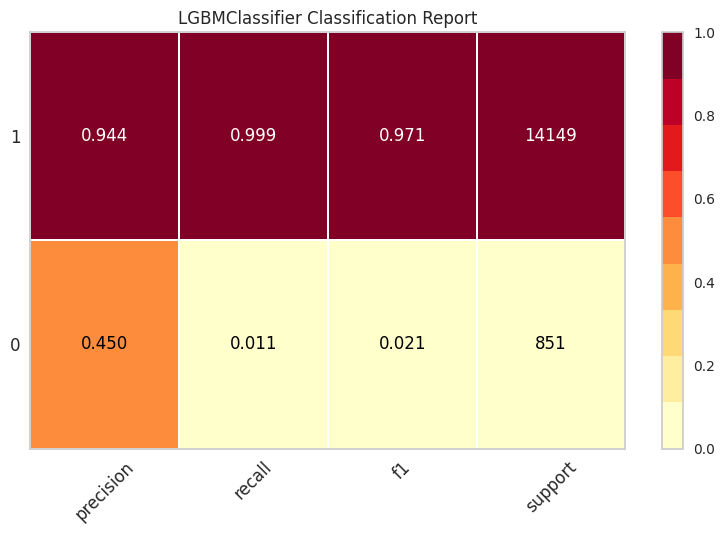

In [28]:
plot_model(lgbm_model, plot = 'class_report')

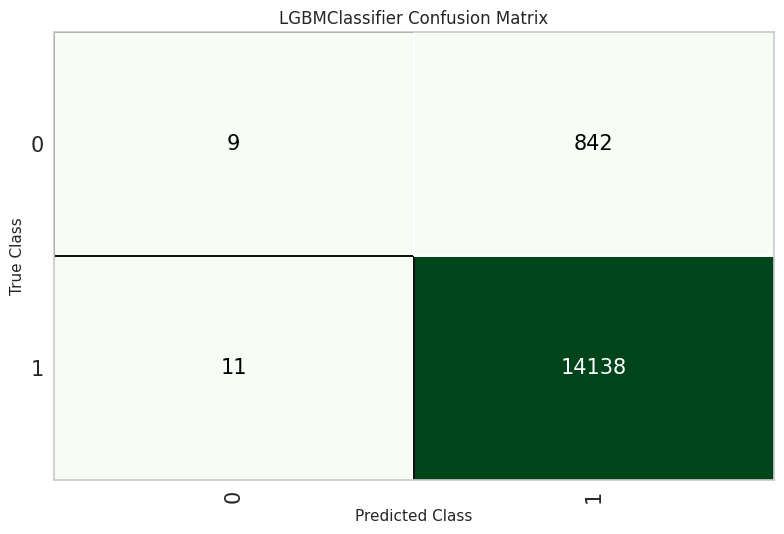

In [29]:
plot_model(lgbm_model, plot = 'confusion_matrix')

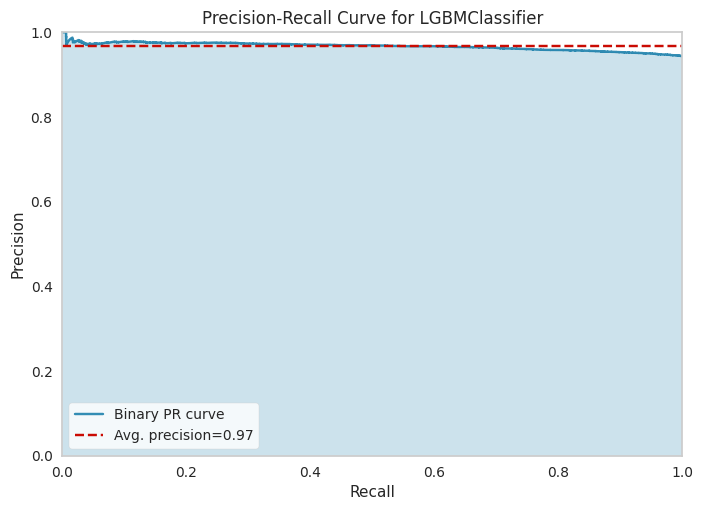

In [30]:
plot_model(lgbm_model, plot = 'pr')

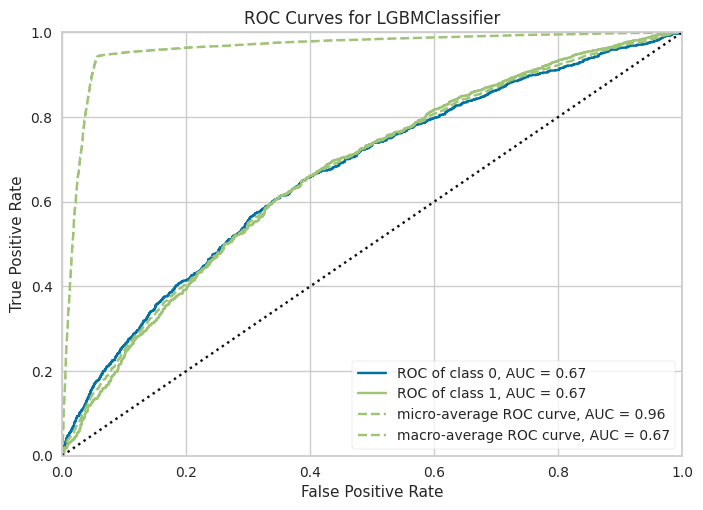

In [31]:
plot_model(lgbm_model, plot = 'auc')

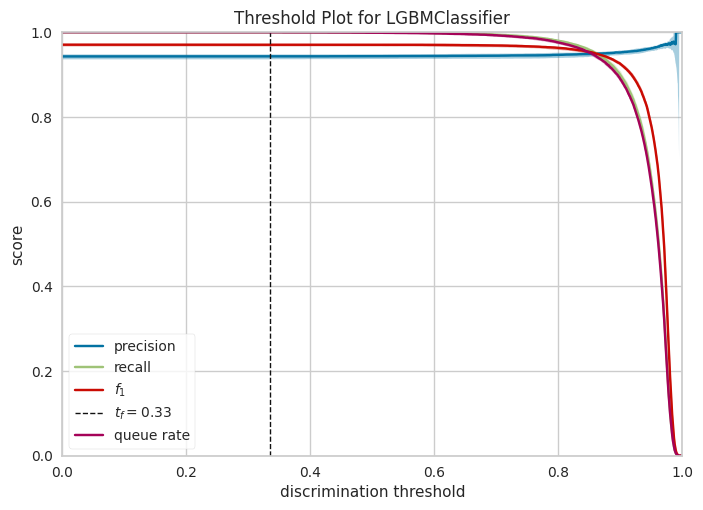

In [32]:
plot_model(lgbm_model, plot = 'threshold')

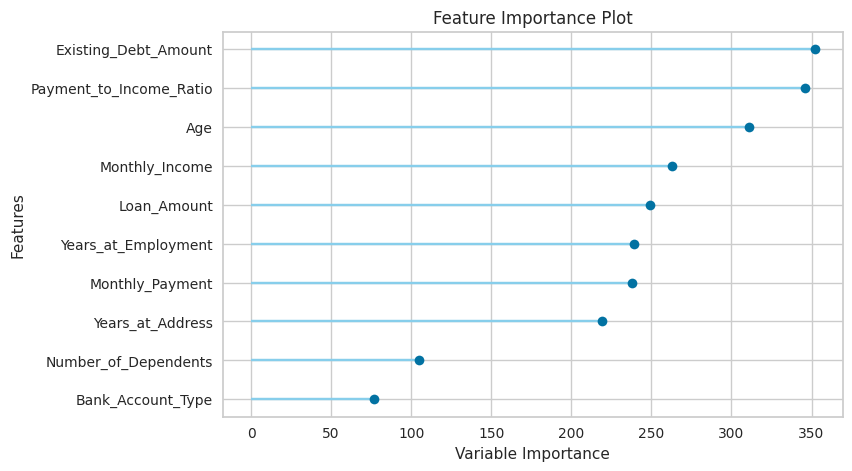

In [33]:
plot_model(lgbm_model, plot = 'feature')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

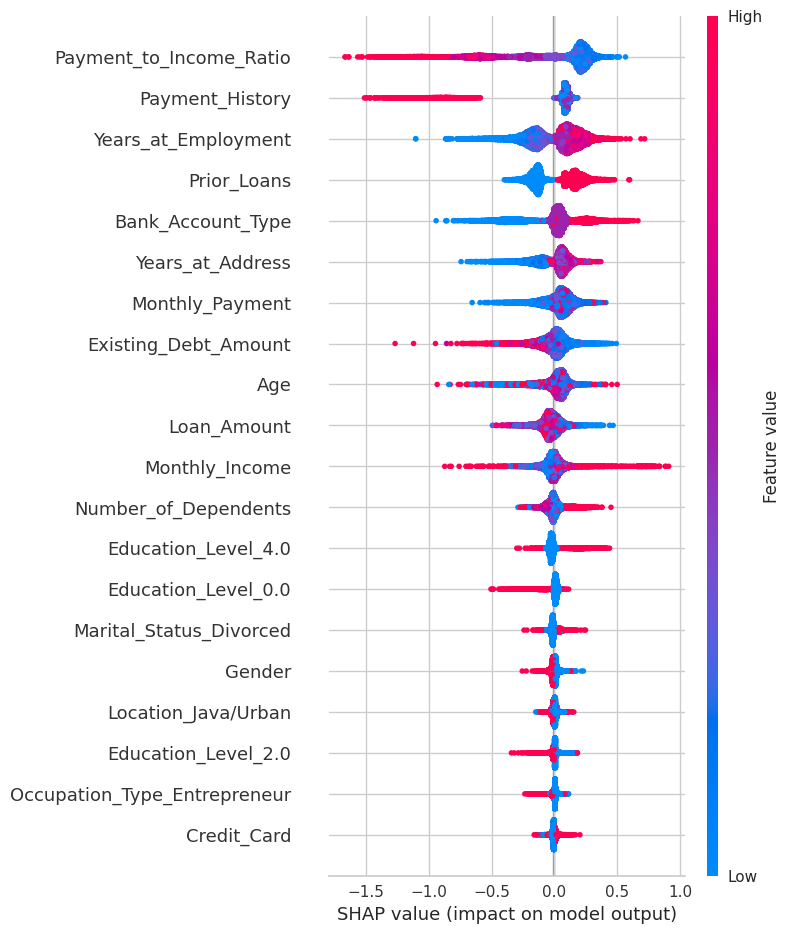

In [34]:
interpret_model(lgbm_model, plot = 'summary')

In [35]:
interpret_model(lgbm_model, plot = 'reason', observation = 1)

In [36]:
check_fairness(lgbm_model, sensitive_features = ['Gender'])

ValueError: Layout of 3x3 must be larger than required size 10

<Figure size 1600x800 with 0 Axes>

Could be caused by additional metrics.

### Prediction

In [37]:
holdout_pred = predict_model(lgbm_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Recall Class 0,Balanced Accuracy
0,Light Gradient Boosting Machine,0.9431,0.6686,0.9431,0.9158,0.9168,0.0181,0.0621,0.0106,0.5049


In [38]:
holdout_pred.head()

,Age,Gender,Location,Education_Level,Occupation_Type,Marital_Status,Number_of_Dependents,Years_at_Address,Years_at_Employment,Monthly_Income,...,Monthly_Payment,Payment_to_Income_Ratio,Existing_Debt_Amount,Prior_Loans,Payment_History,Bank_Account_Type,Credit_Card,Loan_Status,prediction_label,prediction_score
10743,51,Male,Sumatra,Secondary,Formal Employee,Single,0,4,7,7167782,...,628828.37500,0.087730,8417843,Yes,Good,Basic,Yes,Fully Paid,Fully Paid,0.9693
4211,39,Male,Java/Urban,Diploma,Agricultural,Single,0,14,0,2350888,...,694824.25000,0.295558,5039904,Yes,Good,Basic,Yes,Fully Paid,Fully Paid,0.9567
31125,37,Male,Java/Urban,Diploma,Entrepreneur,Widowed,4,0,10,5462698,...,975412.68750,0.178559,8806220,Yes,Good,NaN,No,Fully Paid,Fully Paid,0.9673
42721,36,Male,Sumatra,Diploma,Formal Employee,Married,2,15,15,7255175,...,280158.62500,0.038615,3998933,No,NaN,NaN,No,Fully Paid,Fully Paid,0.9720
19250,25,Male,Java/Rural,High School,Agricultural,Widowed,0,1,7,1783743,...,335691.21875,0.188195,3656992,Yes,Good,Premium,No,Fully Paid,Fully Paid,0.9806


### Save Model

In [39]:
final_model = finalize_model(lgbm_model)

In [40]:
save_model(final_model, 'lgbm_pipeline_test')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Number_of_Dependents',
                                              'Years_at_Address',
                                              'Years_at_Employment',
                                              'Monthly_Income', 'Loan_Amount',
                                              'Loan_Term', 'Monthly_Payment',
                                              'Payment_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                

In [41]:
# load pipeline
loaded_best_pipeline = load_model('lgbm_pipeline_test')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Number_of_Dependents',
                                             'Years_at_Address',
                                             'Years_at_Employment',
                                             'Monthly_Income', 'Loan_Amount',
                                             'Loan_Term', 'Monthly_Payment...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### Other Features

In [42]:
create_api(lgbm_model, api_name = 'lgbm_test_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python lgbm_test_api.py


In [43]:
create_docker('lgbm_test_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [46]:
dashboard(lgbm_model, display_format ='dash')


Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


100%|===================| 14956/15000 [00:29<00:00]        

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.0.1.122:8050


In [ ]:
create_app(lgbm_model)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
